# SpaceX Falcon 9 First Stage Landing Prediction

## Lab 4: Exploring and Preparing Data

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

### Objective
* Exploratory Data Analysis
* Preparing Data Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


#### Exploratory Data Analysis

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

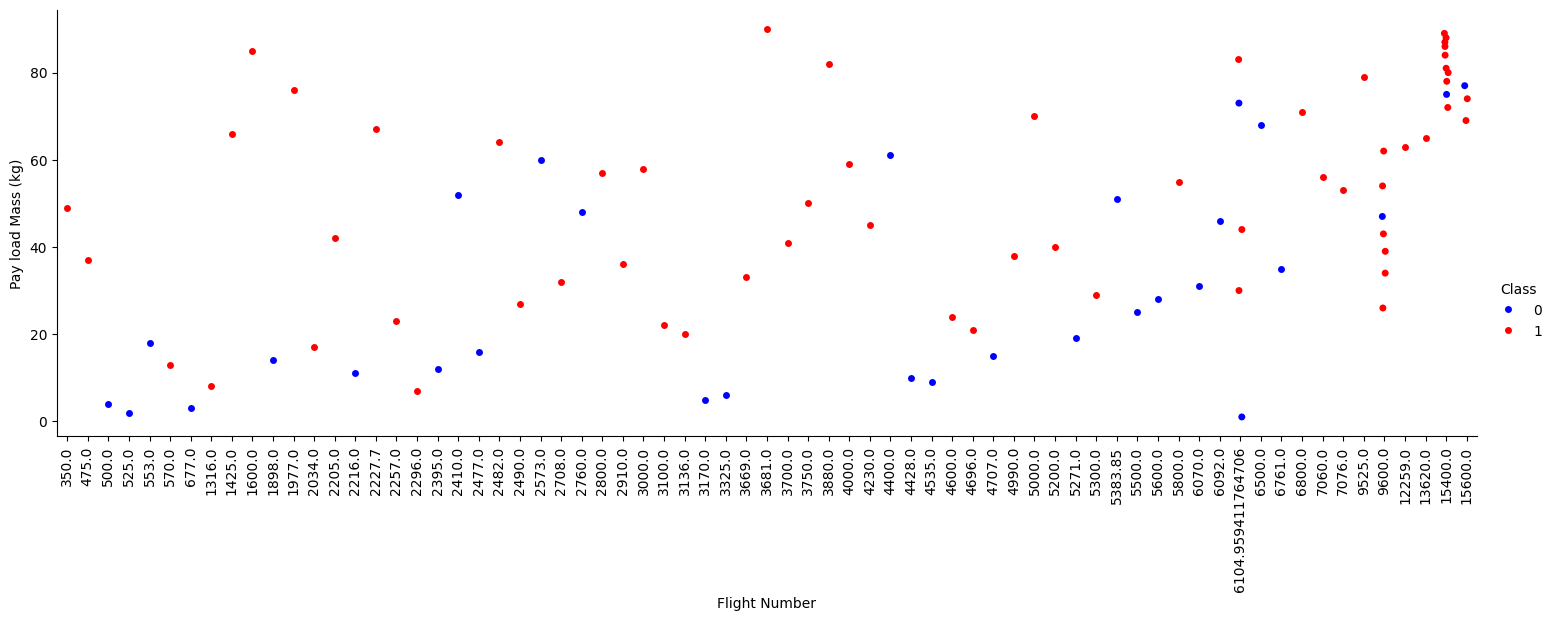

In [3]:
pal = {0:"blue", 1:"red"}
sns.catplot(x="PayloadMass", y="FlightNumber", data=df, hue="Class", palette=pal, aspect=3)
plt.xlabel("Flight Number")
plt.ylabel("Pay load Mass (kg)")
plt.xticks(rotation=90)
plt.show()

#### TASK 1: Visualize the relationship between Flight Number and Launch Site
Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

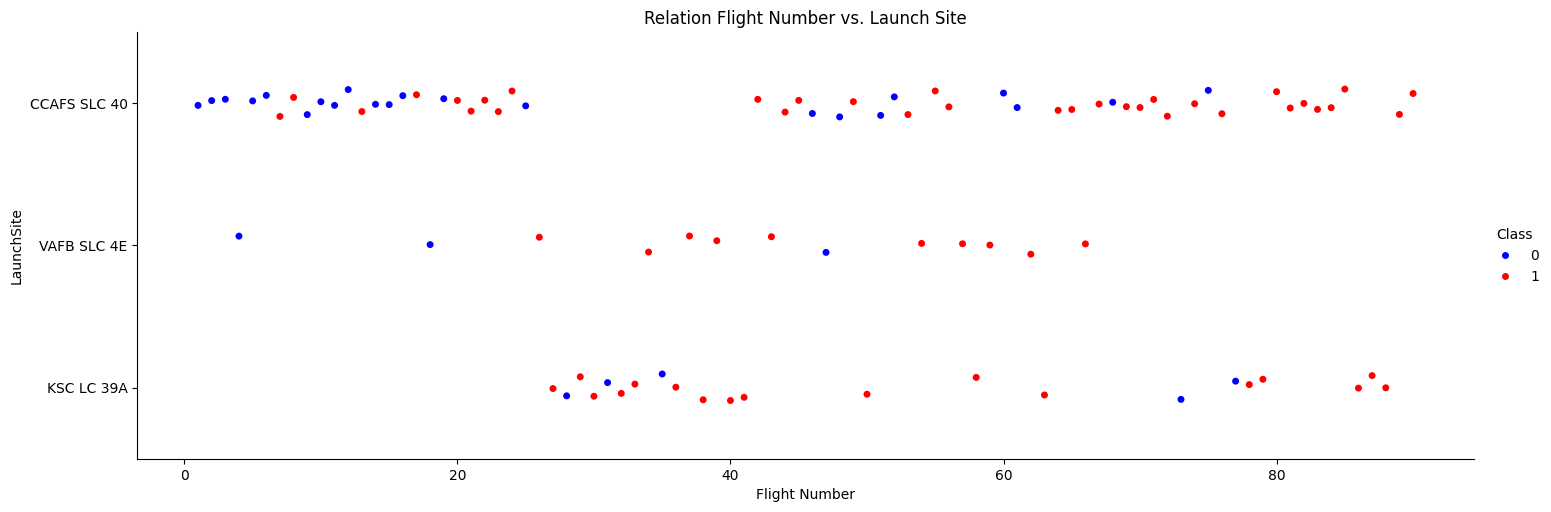

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x="FlightNumber",y="LaunchSite", data=df, hue="Class", palette=pal, aspect=3)
plt.title("Relation Flight Number vs. Launch Site")
plt.xlabel("Flight Number")
plt.ylabel("LaunchSite")
plt.show()

**Explanation**: We can see from the scatter plot that as flight number increases, there are more successful first stage landing. With small flight numbers, launches happens more in the site CCAFS SLC 40 and with much lower success rate. Although there are less launches in VAFB SLC 4E and KSC LC 39A, higher success rate can be seen in these two sites.

#### TASK 2: Visualize the relationship between Payload and Launch Site
We also want to observe if there is any relationship between launch sites and their payload mass.

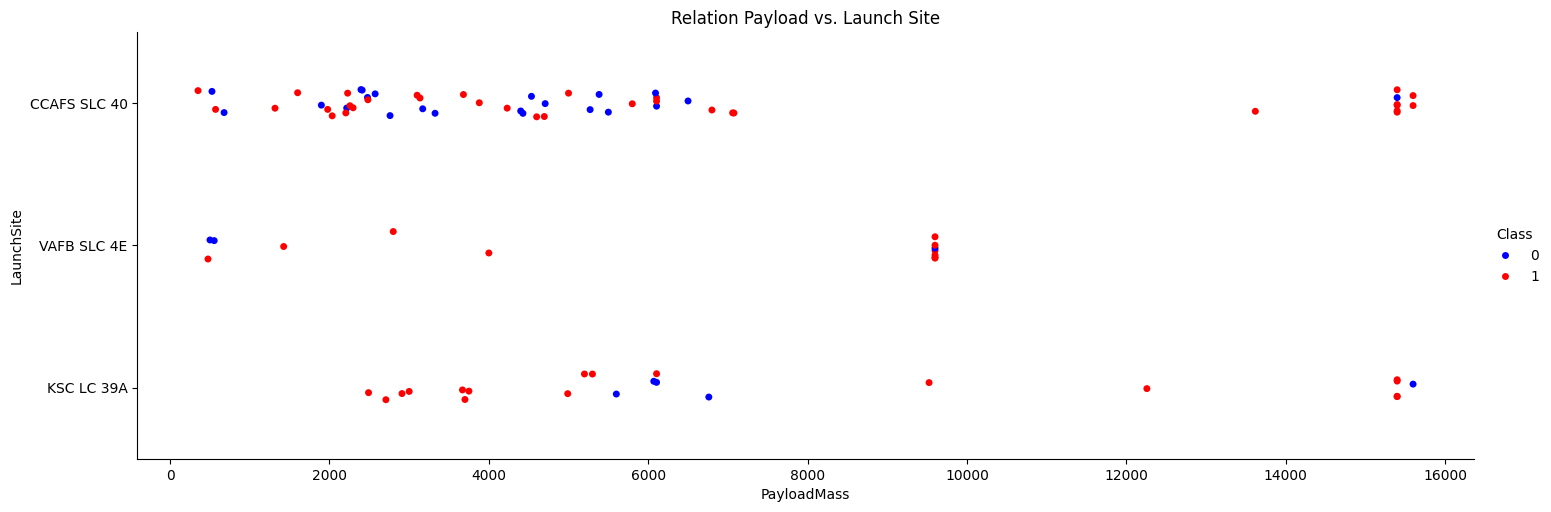

In [5]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x="PayloadMass", y="LaunchSite", data=df, hue="Class", palette=pal, aspect=3)
plt.title("Relation Payload vs. Launch Site")
plt.xlabel("PayloadMass")
plt.ylabel("LaunchSite")
plt.show()

**Explanation**: With higher Payload the success rate is much higher. And in KSC LC39A launchsite we can see much higher success rate with low Payload whereas this rate is mucher lower in CCAFS SLC 40 launchsite. Besides, there no rockets launched in VAFB-SLC for Payload greater than 10000. Furthermore, with Payload more than 9500, we can see very high success rate overall.

#### TASK 3: Visualize the relationship between success rate of each orbit type

In [6]:
feature = df.select_dtypes(include=["number"]).columns.to_list()
df_success_rate = df.groupby("Orbit")[feature].mean()
df_success_rate.reset_index(inplace=True)
df_success_rate.head()

,Orbit,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
0,ES-L1,13.000000,570.000000,1.000000,1.000000,0.000000,-80.577366,28.561857,1.000000
1,GEO,83.000000,6104.959412,2.000000,5.000000,2.000000,-80.577366,28.561857,1.000000
2,GTO,35.037037,5011.994444,1.407407,3.037037,0.962963,-80.586229,28.577258,0.518519
3,HEO,49.000000,350.000000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
4,ISS,39.142857,3279.938095,1.238095,3.142857,1.285714,-80.583697,28.572857,0.619048


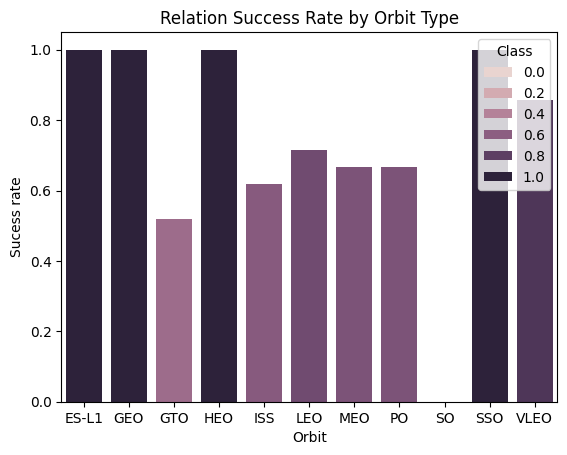

In [7]:
sns.barplot(data=df_success_rate, x="Orbit", y="Class", hue="Class")
plt.title("Relation Success Rate by Orbit Type")
plt.xlabel("Orbit")
plt.ylabel("Sucess rate")
plt.show()

**Explanation**: From the Bar Plot we can see for Orbit type ES-L1, GEO, HEO, and SSO have the highest success rate, which is 100%. And we also find in SO orbit, the rate is zero. Analyze the ploted bar chart try to find which orbits have high sucess rate.

#### TASK 4: Visualize the relationship between FlightNumber and Orbit type

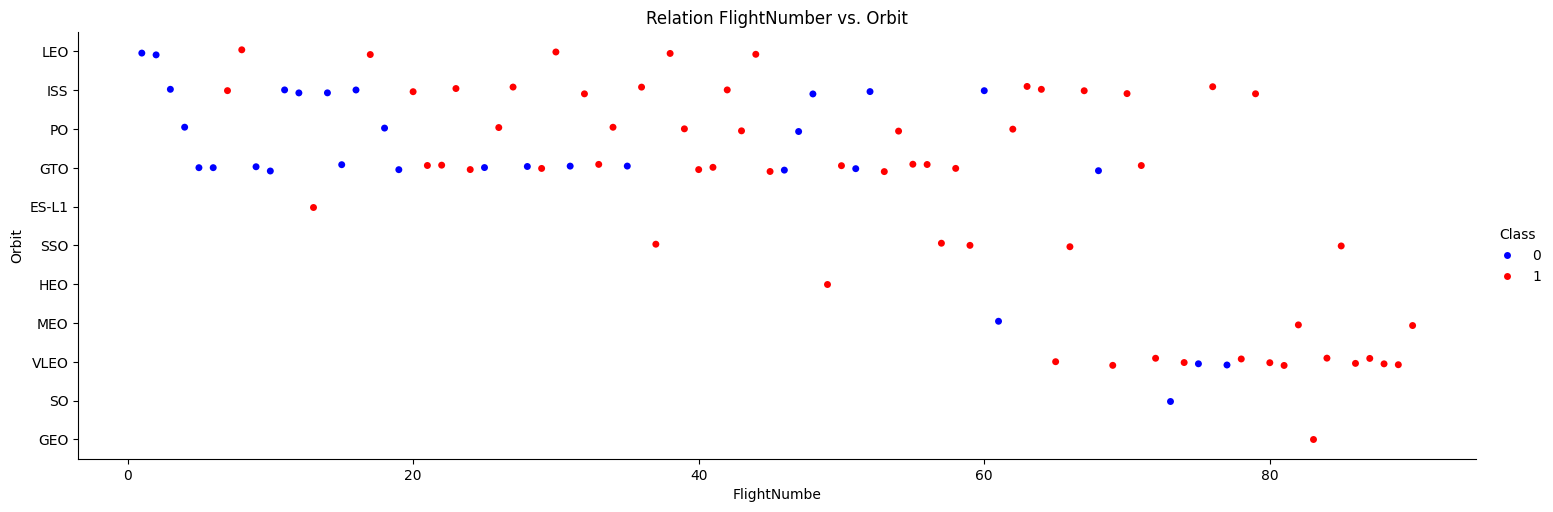

In [8]:
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, palette=pal, aspect=3)
plt.title("Relation FlightNumber vs. Orbit")
plt.xlabel("FlightNumbe")
plt.ylabel("Orbit")
plt.show()

**Explanation**: With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS. However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

#### TASK 6: Visualize the launch success yearly trend

In [9]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

In [10]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
year = Extract_year(df['Date'])
df['Year']=year

In [11]:
df_year_success = df.groupby('Year')[feature].mean()
df_year_success.reset_index(inplace=True)

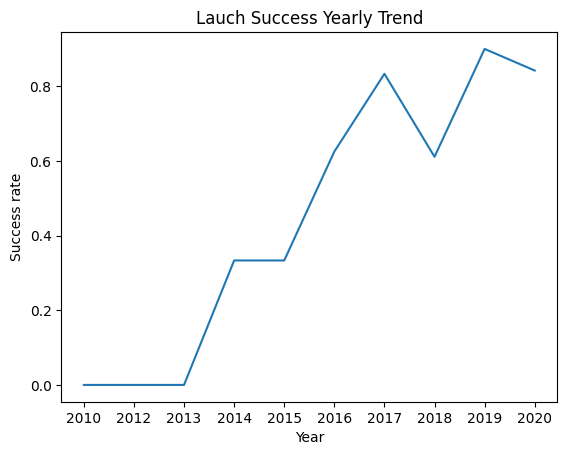

In [12]:
sns.lineplot(x='Year', y='Class', data=df_year_success)
plt.title("Lauch Success Yearly Trend")
plt.xlabel("Year")
plt.ylabel("Success rate")
plt.show()

**Explanation**: the sucess rate since 2013 kept increasing till 2020. The highest poin occured in 2019.

#### Features Engineering

In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused',
               'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


#### TASK 7: Create dummy variables to categorical columns
Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [14]:
df_orbit = pd.get_dummies(features['Orbit'])
df_LaunchSite = pd.get_dummies(features['LaunchSite'])
df_LandingPad = pd.get_dummies(features['LandingPad'])
df_Serial = pd.get_dummies(features['Serial'])

In [15]:
features_one_hot = pd.concat([df_orbit, df_LaunchSite, df_LandingPad, df_Serial], axis=1)
features_one_hot.head()

,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### TASK 8: Cast all numeric columns to float64
Now that our features_one_hot dataframe only contains numbers cast the entire dataframe to variable type float64

In [16]:
features_one_hot.astype('float64')

,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

In [17]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)